In [1]:
# auto-reload modules
%load_ext autoreload
%autoreload 2

In [2]:
import json
import sys
from pathlib import Path
import random

import networkx as nx
from IPython.display import Image

# Add the parent directory of 'graphs' to sys.path
sys.path.append(Path("./../..").resolve().as_posix())

from graphs.utils.plot import draw_digraph, draw_graph
from edge_boundary.add_services import add_services_v1, add_services_v2, add_services_v3

## Simple case

In [11]:
G_from = nx.gnp_random_graph(50, 0.01, directed=True)

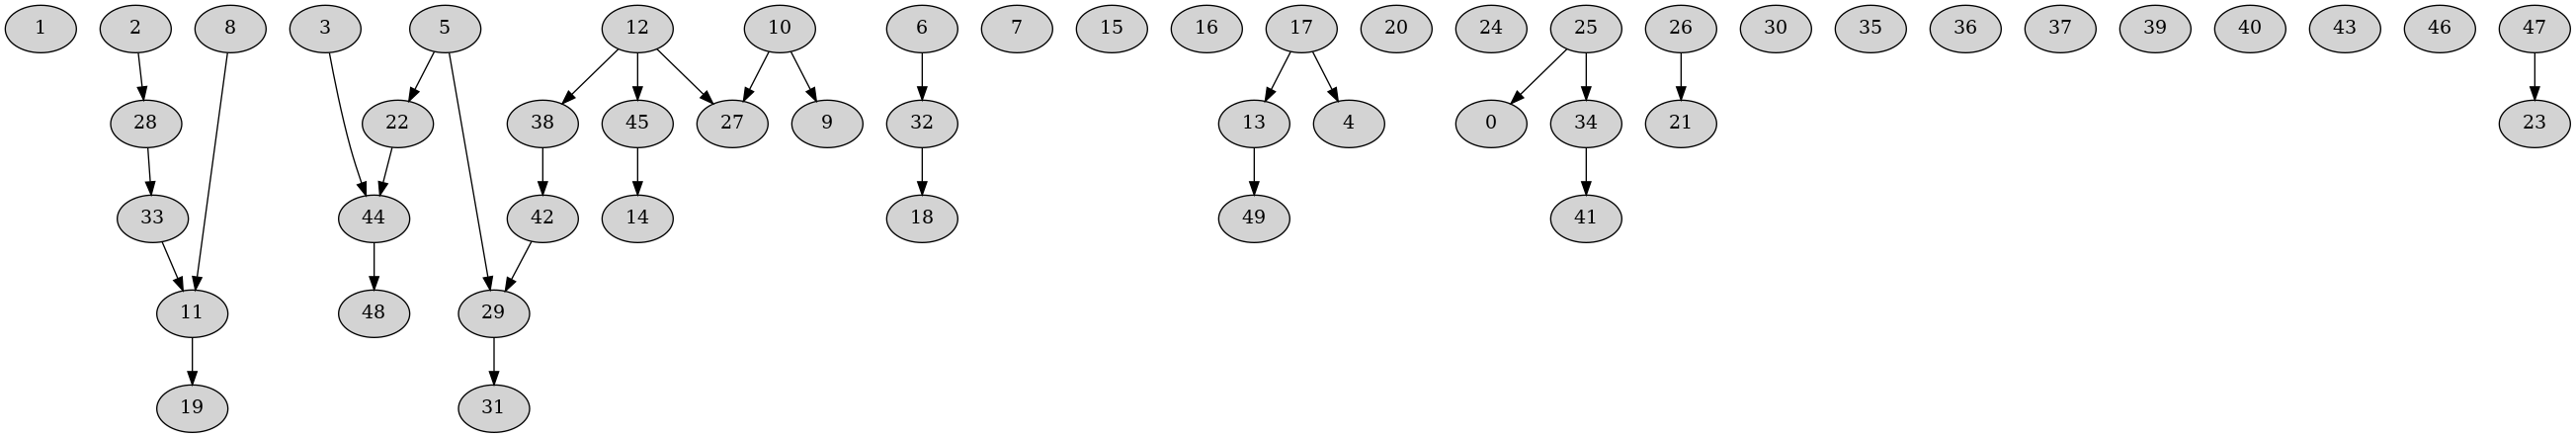

In [12]:
Image(draw_digraph(G_from))

In [51]:
G_from = nx.gnm_random_graph(50, 80)

In [27]:
edges = nx.to_dict_of_lists(G_from)
with open('G_from.json', 'w') as f:
    json.dump(edges, f, indent=4)

In [52]:
G_from_directed = nx.from_edgelist(G_from.edges(), create_using=nx.DiGraph)

In [3]:
with open('G_from_directed.json', 'r') as f:
    G_from_directed = nx.from_dict_of_lists(json.load(f), create_using=nx.DiGraph)

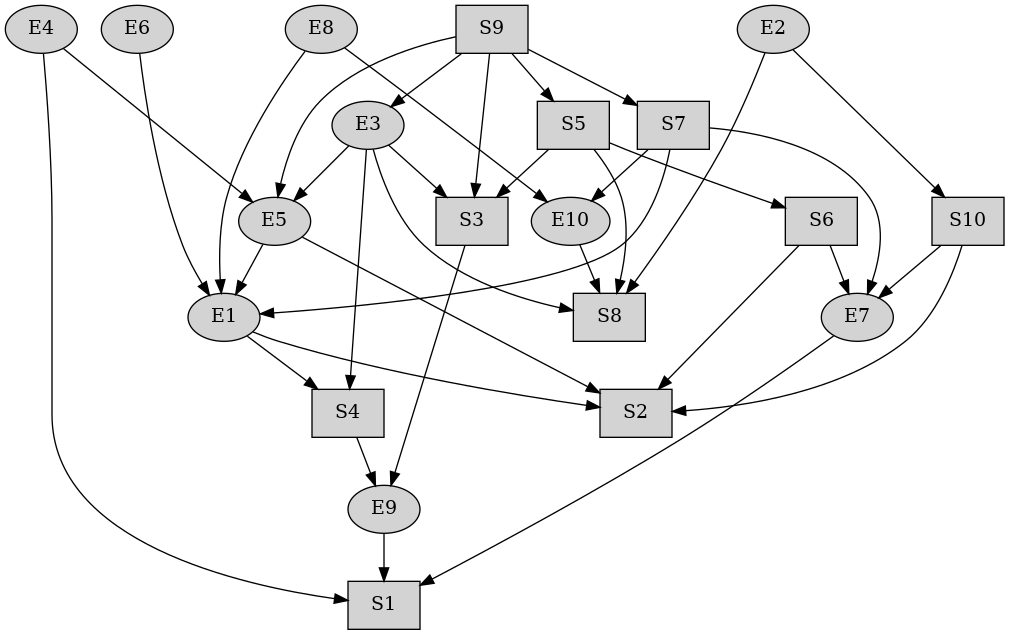

In [4]:
Image(draw_digraph(G_from_directed))

In [6]:
hidden_deps = [
    edge
    for edge in G_from_directed.edges()
    if edge[0].startswith("E") and edge[1].startswith("S")
]
hidden_deps

[('E4', 'S1'),
 ('E5', 'S2'),
 ('E1', 'S2'),
 ('E1', 'S4'),
 ('E3', 'S3'),
 ('E3', 'S8'),
 ('E3', 'S4'),
 ('E10', 'S8'),
 ('E7', 'S1'),
 ('E9', 'S1'),
 ('E2', 'S10'),
 ('E2', 'S8')]

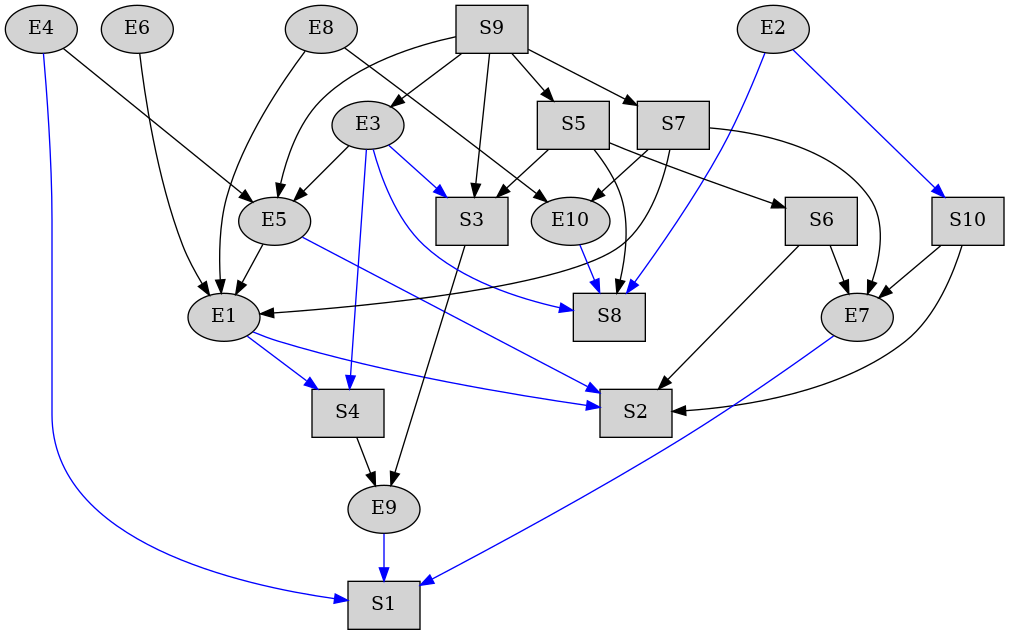

In [8]:
Image(draw_digraph(G_from_directed, colored_edges={edge: "blue" for edge in hidden_deps}))

In [54]:
def relabel_nodes_randomly(graph):
    # Get all nodes from the graph
    nodes = list(graph.nodes())

    # Shuffle the nodes to ensure randomness
    random.shuffle(nodes)

    # Calculate the split point for 1/3 of the nodes
    split_point = len(nodes) // 2

    # Assign new names to the nodes
    new_names = {}
    for i, node in enumerate(nodes):
        if i < split_point:
            new_names[node] = f'S{i + 1}'
        else:
            new_names[node] = f'E{i - split_point + 1}'

    # Relabel the nodes in the graph
    relabeled_graph = nx.relabel_nodes(graph, new_names)

    # Return the new names and the relabeled graph
    return new_names, relabeled_graph

In [55]:
new_names, G_from_directed = relabel_nodes_randomly(G_from_directed)
new_names

{1: 'S1',
 37: 'S2',
 11: 'S3',
 6: 'S4',
 32: 'S5',
 9: 'S6',
 10: 'S7',
 15: 'S8',
 43: 'S9',
 20: 'S10',
 46: 'S11',
 29: 'S12',
 4: 'S13',
 12: 'S14',
 8: 'S15',
 19: 'S16',
 49: 'S17',
 25: 'S18',
 2: 'S19',
 22: 'S20',
 14: 'S21',
 45: 'S22',
 5: 'S23',
 41: 'S24',
 36: 'E1',
 34: 'E2',
 39: 'E3',
 28: 'E4',
 40: 'E5',
 30: 'E6',
 47: 'E7',
 27: 'E8',
 18: 'E9',
 13: 'E10',
 26: 'E11',
 31: 'E12',
 0: 'E13',
 23: 'E14',
 44: 'E15',
 7: 'E16',
 17: 'E17',
 38: 'E18',
 16: 'E19',
 3: 'E20',
 33: 'E21',
 21: 'E22',
 42: 'E23',
 24: 'E24',
 48: 'E25'}

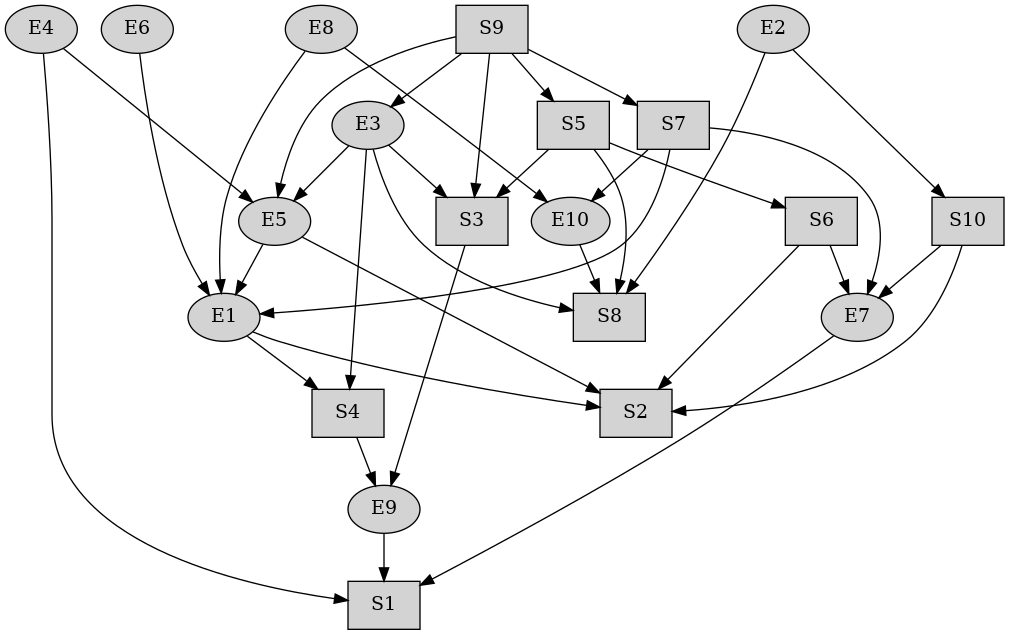

In [28]:
Image(draw_digraph(G_from_directed))

In [69]:
edges = nx.to_dict_of_lists(G_from_directed)
with open('G_from_directed_1.json', 'w') as f:
    json.dump(edges, f, indent=4)

In [7]:
from_graph = G_from_directed

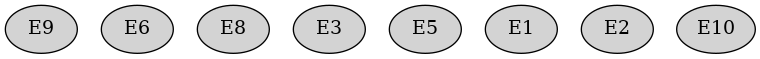

In [27]:
# Get all nodes starting with "E" from G_from_directed
e_nodes = [node for node in G_from_directed.nodes() if node.startswith('E')]

# Select 2 random nodes from the list of "E" nodes
random_e_nodes = random.sample(e_nodes, 8)

# Create a new directed graph with the selected nodes
to_graph = nx.DiGraph()
to_graph.add_nodes_from(random_e_nodes)

# Display the new graph
Image(draw_digraph(to_graph))

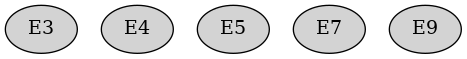

In [5]:
to_graph = nx.from_dict_of_lists({"E3":[], "E4":[], "E5":[], "E7":[], "E9":[]} , create_using=nx.DiGraph)
Image(draw_digraph(to_graph))

In [13]:
G_v1 = add_services_v1(
    to_graph.copy(),
    from_graph.copy(),
    save_plot="auto_add_services_v1_4"
)

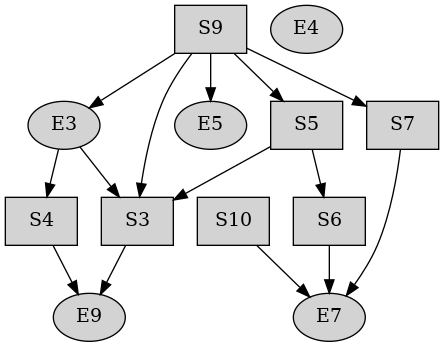

In [12]:
Image(draw_graph(G_v1))

In [16]:
G_v2 = add_services_v2(
    to_graph.copy(),
    from_graph.copy(),
    save_plot="auto_add_services_v2_41",
)

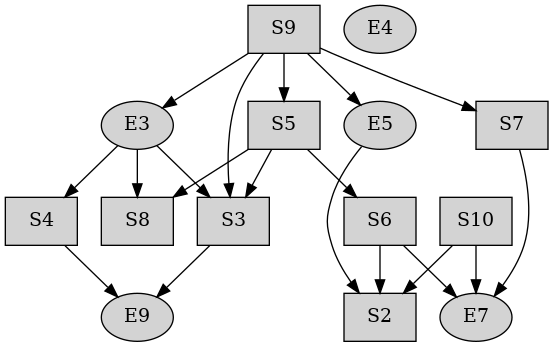

In [17]:
Image(draw_graph(G_v2))

In [19]:
G_v3 = add_services_v3(
    to_graph.copy(),
    from_graph.copy(),
    save_plot="auto_add_services_v3_4",
)

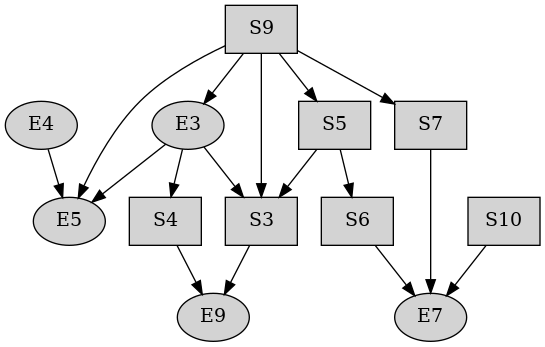

In [20]:
Image(draw_graph(G_v3))

## Considering different types of nodes

In [7]:
from_graph = nx.from_dict_of_lists(
    {
        "P1": ["S1"],
        "P2": ["S1", "S2"],
        "P3": ["S2"],
        "S2": ["S3"],
        "S3": ["P1"],
    },
    create_using=nx.DiGraph,
).reverse()

In [8]:
to_graph = nx.from_dict_of_lists(
    {
        "P1": [],
        "P2": [],
    },
    create_using=nx.DiGraph,
).reverse()

In [22]:
G = add_services_v2(
    to_graph.copy(),
    from_graph.copy(),
    # save_plot="auto_add_services_v2_0",
)

In [9]:
G = add_services_v3(
    to_graph.copy(),
    from_graph.copy(),
)

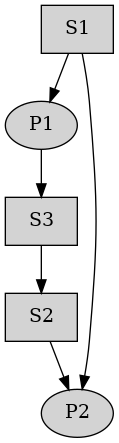

In [10]:
Image(draw_digraph(G))

In [21]:
nx.ancestors(from_graph, "P2")

{'P1', 'S1', 'S2', 'S3'}